In [0]:
#@title
from google.colab import files
uploaded = files.upload()

In [0]:
#@title
import pandas as pd
income = pd.read_csv('income_data.csv')
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
#@title
income.shape

(32561, 15)

In [0]:
#@title
assert pd.notnull(income).all().all()

In [0]:
#@title
income.info() #get unique data in dataset. seems like no NAs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
#@title
income.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [0]:
#@title
colNameDict = {' workclass':'workclass',' fnlwgt':'fnlwgt', ' education':'education', ' education-num':'educationnum', ' marital-status':'maritalstatus',
               ' occupation':'occupation', ' relationship':'relationship', ' race':'race', ' sex':'sex', ' capital-gain':'capitalgain', 
               ' capital-loss':'capitalloss', ' hours-per-week':'hoursperweek', ' native-country':'nativecountry', ' income':'income'
               }
income.rename(columns = colNameDict,inplace=True)  #some columne names contain whitespace. replace them
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnum',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [0]:
#@title
income.describe() #check on the numeric columns

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


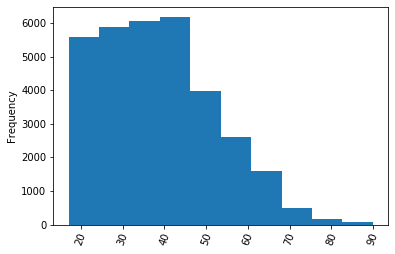

In [0]:
#@title
import matplotlib.pyplot as plt
income['age'].plot(kind='hist', rot=70, logx=False, logy=False)
plt.show()
#and plot other numeric variables... seems fine.

In [0]:
#@title
income[income['hoursperweek'] == 99].head() #there are 85 people work 99 hours perweek. so far looks legit.

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
3578,37,Self-emp-inc,382802,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
4086,50,?,174964,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K


Text(0, 0.5, 'High Salary')

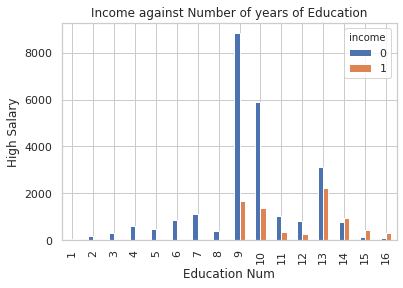

In [0]:
#@title
%matplotlib inline
pd.crosstab(income['educationnum'],income['income']).plot(kind='bar')
plt.title('Income against Number of years of Education')
plt.xlabel('Education Num')
plt.ylabel('High Salary')

Test Train set split and fitting

In [0]:
#@title
import numpy as np

In [0]:
#@title
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
#@title
income.income.value_counts()
#approx. plain income : high income = 3:1

0    24720
1     7841
Name: income, dtype: int64

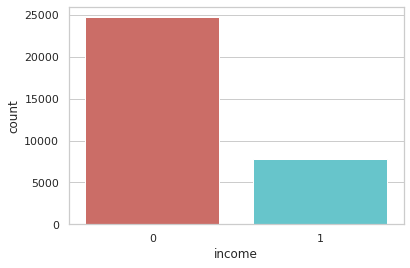

<Figure size 432x288 with 0 Axes>

In [0]:
#@title
sns.countplot(x=income['income'], data= income, palette='hls')
plt.show()
plt.savefig('count_plot')

In [0]:
#@title
income.groupby('income').mean()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
income,,,,,,
0,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
1,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [0]:
#@title
corrdf=income.corr()
corrdf

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
educationnum,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capitalgain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capitalloss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hoursperweek,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


In [0]:
#@title
corrdf['income'].sort_values(ascending=False)

income          1.000000
educationnum    0.335154
age             0.234037
hoursperweek    0.229689
capitalgain     0.223329
capitalloss     0.150526
fnlwgt         -0.009463
Name: income, dtype: float64

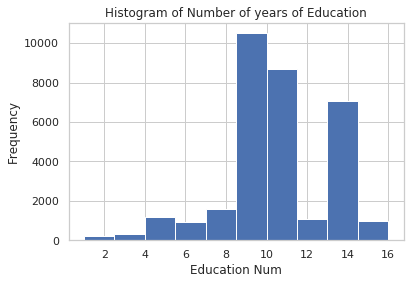

In [0]:
#@title
income.educationnum.hist()
plt.title('Histogram of Number of years of Education')
plt.xlabel('Education Num')
plt.ylabel('Frequency')
plt.savefig('hist_edu')

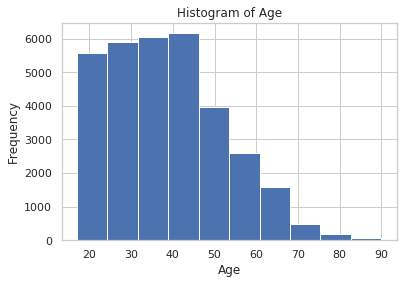

In [0]:
#@title
income.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

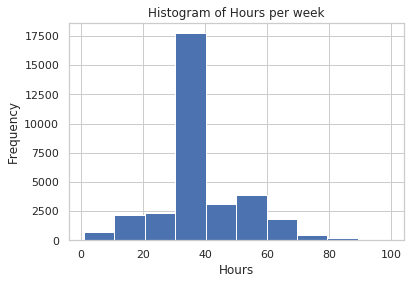

In [0]:
#@title
income.hoursperweek.hist()
plt.title('Histogram of Hours per week')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.savefig('hist_hours')

In [0]:
#@title
keepers = ['income', 'age', 'educationnum', 'capitalgain', 'hoursperweek']
data=income[keepers]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
income          32561 non-null int64
age             32561 non-null int64
educationnum    32561 non-null int64
capitalgain     32561 non-null int64
hoursperweek    32561 non-null int64
dtypes: int64(5)
memory usage: 1.2 MB


In [0]:
#@title
data.head()

,income,age,educationnum,capitalgain,hoursperweek
0,0,39,13,2174,40
1,0,50,13,0,13
2,0,38,9,0,40
3,0,53,7,0,40
4,0,28,13,0,40


In [0]:
#@title
X = data.loc[:, data.columns != 'income']
y = data.loc[:, data.columns == 'income']
from imblearn.over_sampling import SMOTE #apply oversampling technique to generate a balanced dataset
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['income'])
print("length of oversampled data is ",len(os_data_X))
print("Number of plain income in oversampled data",len(os_data_y[os_data_y['income']==0]))
print("Number of high income",len(os_data_y[os_data_y['income']==1]))
print("Proportion of plain income data in oversampled data is ",len(os_data_y[os_data_y['income']==0])/len(os_data_X))
print("Proportion of high income data in oversampled data is ",len(os_data_y[os_data_y['income']==1])/len(os_data_X))

length of oversampled data is  34626
Number of plain income in oversampled data 17313
Number of high income 17313
Proportion of plain income data in oversampled data is  0.5
Proportion of high income data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#@title
os_data_X = os_data_X.astype(np.int)
os_data_y= os_data_y.astype(np.int)
y = os_data_y
X = os_data_X
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.642492
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.073     
Dependent Variable: income           AIC:              44501.8553
Date:               2020-01-13 05:51 BIC:              44535.6647
No. Observations:   34626            Log-Likelihood:   -22247.   
Df Model:           3                LL-Null:          -24001.   
Df Residuals:       34622            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0002    0.0008   0.3085  0.7577  -0.0013   0.0017
educationnum   0.0137    0.0036   3.8337  0.0001   0.0067   0.

In [0]:
#@title
#model fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#@title
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [0]:
#@title
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix) #correction prediction(3837+3773), incorrect prediction(1305+1473)

[[3837 1305]
 [1473 3773]]


In [0]:
#@title
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      5142
           1       0.74      0.72      0.73      5246

    accuracy                           0.73     10388
   macro avg       0.73      0.73      0.73     10388
weighted avg       0.73      0.73      0.73     10388



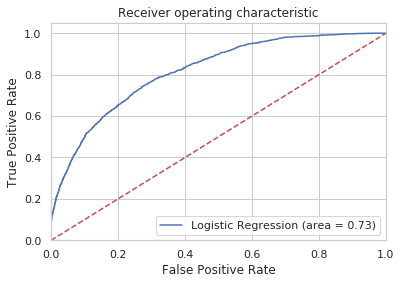

In [0]:
#@title
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() #ROC curve stays above average dotted line. the model is good.